In [1]:
import sinaps as sn
Ca=sn.ions.Ca

Loading BokehJS ...

In [34]:
n=1

N=sn.Neuron()

for i in range(n):
    N.add_section(sn.Section(L=10,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.7,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0),# mV
                 2*i,2*i+1) 
    N.add_section(sn.Section(L=1200,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.8-0.12*i,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=0.15,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0),# mV
                2*i+1,2*i+2)
    N[2*i].dx=10
    N[2*i+1].dx=200




In [20]:
import numpy as np

In [35]:
N[0].add_channel(sn.channels.custom(lambda V,t:50*np.sin(t/10)),0)
for i in range(n):
    N[2*i].add_channel(sn.channels.Hodgkin_Huxley())
    N[2*i+1].add_channel(sn.channels.LeakChannel(0.03))

In [36]:
sim=sn.Simulation(N,dx=0)

In [49]:
sim.run((0,200))





  0%|          | 0/200 [00:00<?, ?ms/s]



  4%|▎         | 7.077/200 [00:00<00:02, 70.73ms/s]



 31%|███▏      | 62.553/200 [00:00<00:01, 95.79ms/s]



 41%|████      | 81.527/200 [00:00<00:01, 112.44ms/s]



 68%|██████▊   | 135.463/200 [00:00<00:00, 147.22ms/s]



 98%|█████████▊| 195.486/200 [00:00<00:00, 190.12ms/s]



100%|██████████| 200.0/200 [00:00<00:00, 360.76ms/s]  

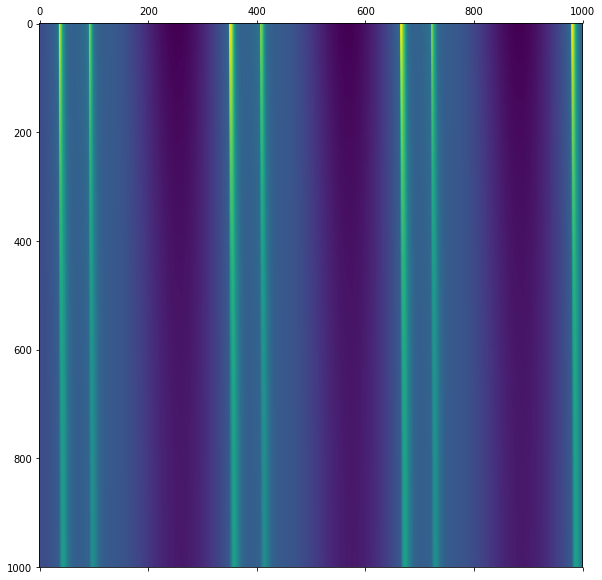

In [50]:
sim.view.graph2D()

In [51]:
sim.view.V(0)